In [1]:
# Test to create an image module
# pynwb.base.Image

In [2]:
!rm test_Images.nwb

In [3]:
# Creating, writing and reading NWB file
import numpy as np
import pynwb
from pynwb import *

from pynwb import TimeSeries
from pynwb import image
import quantities as pq
from quantities import s, ms, kHz, Hz, uV

from matplotlib import pyplot
import matplotlib.pyplot as plt

import random

In [4]:
# Creating the NWBFile
from datetime import datetime
from pynwb import NWBFile

start_time = datetime.now()
print("start_time = ", start_time)
file_create_date = datetime.now()
print("file_create_date = ", file_create_date)
print("   ")

f = NWBFile('PyNWB Image',
                  session_start_time=start_time,
                  identifier='',
           )
print("f = ", f)

start_time =  2020-02-21 15:09:52.277900
file_create_date =  2020-02-21 15:09:52.278493
   
f =  root pynwb.file.NWBFile at 0x140002179334720
Fields:
  file_create_date: [datetime.datetime(2020, 2, 21, 15, 9, 52, 282173, tzinfo=tzlocal())]
  session_description: PyNWB Image
  session_start_time: 2020-02-21 15:09:52.277900+01:00
  timestamps_reference_time: 2020-02-21 15:09:52.277900+01:00



/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/pynwb/file.py:691: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")


In [5]:
# Write the NWB File to the disk using the HDF5IO class

filename = "test_Images.nwb"
io = NWBHDF5IO(filename, manager=get_manager(), mode='w')

print("io = ", io)
print("filename = ", filename)

io =  <pynwb.NWBHDF5IO object at 0x7f548e515be0>
filename =  test_Images.nwb


In [6]:
# Creating TimeSeries

#ts = TimeSeries('timeseries',
#                rate=10.,
#                resolution=0.1)

#print("ts = ", ts)
#f.add_acquisition(ts)
#print("   ")

In [7]:
# Creating an Image module

#img_sequence_array = [[[column for column in range(2)]for row in range(3)] for frame in range(4)]
#print("img_sequence_array = ", img_sequence_array)

#image = image.ImageSeries(
#              name='name of the image',
#              ######data=[[[column for column in range(2)]for row in range(3)] for frame in range(4)],
#              #unit=None,
#              unit='V',
#              #format=None, 
#              format='jpg', # 'tiff', 'png', 'jpg', 'raw'          
#              #format='external', # If format, you need to specify external_file
#              ###external_file=None,
####              external_file=['/home/elodie/env_NWB_py3/my_notebook/pynwb_ImageSeries.jpg'],          
#              external_file=['pynwb_ImageSeries.jpg'],   
#              starting_frame=None, 
#              bits_per_pixel=None, 
#              dimension=None,
#              resolution=-1.0,
#              conversion=float(1*pq.micrometer),
#              timestamps=None,
#              starting_time=None, 
#              rate=float(1*pq.Hz), #sampling_rate
#              comments='no comments', 
#              description='no description', 
#              control=None, 
#              control_description=None
#              )

#print("image = ", image)
#
#f.add_acquisition(image)


In [8]:
#print("image.format = ", image.format)
#print("image.external_file = ", image.external_file)

### Adding metadata about acquisition

In [9]:
##################
# For pynwb.ophys
##################

### Stores pixels in an image that represent different regions of interest (ROIs).

from pynwb.device import Device
# TwoPhotonSeries, OpticalChannel, ImageSegmentation, Fluorescence
from pynwb.ophys import TwoPhotonSeries, OpticalChannel, ImageSegmentation, Fluorescence

device = Device('imaging_device_1')

f.add_device(device)


l = []
for frame in range(50):
    l.append([])
    for y in range(100):
        l[frame].append([])
        for x in range(100):
            l[frame][y].append(random.randint(0, 50))
            

# OpticalChannel
optical_channel = OpticalChannel('my_optchan', 'description', 500.)

imaging_plane = f.create_imaging_plane(
                          'my_imgpln', # name
                           optical_channel, # type
                          'a very interesting part of the brain', # description
                           device,
                           600., # excitation_lambda
                           300., # imaging_rate
                          'GFP', # indicator
                          'my favorite brain location', # location
                           #np.ones((5, 5, 3)), # 5 matrices de 5*3 - manifold            
                           l[frame][y].append(random.randint(0, 50)), # from Neo ImageSequence example # manifold
                           #4.0, # conversion                       
                           1.0, # conversion
                           'manifold unit', # unit
                           'A frame to refer to' # reference_frame
                                      )
print("imaging_plane = ", imaging_plane)
print("imaging_plane.manifold = ", imaging_plane.manifold)


### Add metadata in acquisition


imaging_plane =  my_imgpln pynwb.ophys.ImagingPlane at 0x140002221608576
Fields:
  conversion: 1.0
  description: a very interesting part of the brain
  device: imaging_device_1 pynwb.device.Device at 0x140001134035688
  excitation_lambda: 600.0
  imaging_rate: 300.0
  indicator: GFP
  location: my favorite brain location
  optical_channel: (
    my_optchan <class 'pynwb.ophys.OpticalChannel'>
  )
  reference_frame: A frame to refer to
  unit: manifold unit

imaging_plane.manifold =  None


### Adding two-photon image data

In [10]:
##################
# TwoPhotonSeries
##################

image_series = TwoPhotonSeries(
                                name='test_iS',
                               dimension=[2],
                               
                               ###external_file=['dir_tiff/image_seq_0.tiff'],
                               #external_file=['images.tiff'],
#                               data=[[1, 2, 3, 4, 5], [5, 6, 7, 8, 9]], # must supply either external_file or data
                               external_file=[['dir_tiff/image_seg_0.tiff'], ['dir_tiff/image_seg_1.tiff'], ['dir_tiff/image_seg_2.tiff']], # must supply either external_file or data
                               imaging_plane=imaging_plane,
                               ###starting_frame=[0],
                               ###format='tiff',
                               ###starting_time=0.0,
                               rate=1.0 # if external_file
                              )
                               
print("image_series = ", image_series)
print("image_series.imaging_plane = ", image_series.imaging_plane)

f.add_acquisition(image_series)

### Add two-photon image data


image_series =  test_iS pynwb.ophys.TwoPhotonSeries at 0x140001141785376
Fields:
  comments: no comments
  conversion: 1.0
  data: None
  description: no description
  dimension: [2]
  external_file: [['dir_tiff/image_seg_0.tiff']
 ['dir_tiff/image_seg_1.tiff']
 ['dir_tiff/image_seg_2.tiff']]
  imaging_plane: my_imgpln pynwb.ophys.ImagingPlane at 0x140002221608576
Fields:
  conversion: 1.0
  description: a very interesting part of the brain
  device: imaging_device_1 pynwb.device.Device at 0x140001134035688
  excitation_lambda: 600.0
  imaging_rate: 300.0
  indicator: GFP
  location: my favorite brain location
  optical_channel: (
    my_optchan <class 'pynwb.ophys.OpticalChannel'>
  )
  reference_frame: A frame to refer to
  unit: manifold unit

  rate: 1.0
  resolution: -1.0
  starting_time: 0.0

image_series.imaging_plane =  my_imgpln pynwb.ophys.ImagingPlane at 0x140002221608576
Fields:
  conversion: 1.0
  description: a very interesting part of the brain
  device: imaging_device_1

### Storing image segmentation output

In [11]:
####################
# ImageSegmentation
####################

mod = f.create_processing_module(
                                 'ophys', 
                                 'contains optical physiology processed data'
                                )

img_seg = ImageSegmentation()

mod.add(img_seg)

ps = img_seg.create_plane_segmentation(
                                       'output from segmenting my favorite imaging plane', # description
                                       imaging_plane, # link to OpticalChannel # imaging_plane
                                       'my_planeseg', # name
                                       reference_images = image_series # link to TwoPhotonSeries # reference_images
                                      )
print("ps = ", ps)

### Store image segmentation output


ps =  my_planeseg pynwb.ophys.PlaneSegmentation at 0x140001141785992
Fields:
  description: output from segmenting my favorite imaging plane



In [12]:
### Add the resulting ROIs

w, h = 3, 3
pix_mask1 = [(0, 0, 1.1), (1, 1, 1.2), (2, 2, 1.3)]
img_mask1 = [[0.0 for x in range(w)] for y in range(h)]
img_mask1[0][0] = 1.1
img_mask1[1][1] = 1.2
img_mask1[2][2] = 1.3

ps.add_roi(pixel_mask=pix_mask1, image_mask=img_mask1)

pix_mask2 = [(0, 0, 2.1), (1, 1, 2.2)]
img_mask2 = [[0.0 for x in range(w)] for y in range(h)]
img_mask2[0][0] = 2.1
img_mask2[1][1] = 2.2

ps.add_roi(pixel_mask=pix_mask2, image_mask=img_mask2)


### Storing fluorescence measurements 

In [13]:
###############
# Fluorescence
###############

# Create a data interface
fl = Fluorescence()
mod.add(fl)

# Reference to the ROIs
rt_region = ps.create_roi_table_region('the first of two ROIs', region=[0])

# RoiResponseSeries
data = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]
timestamps = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rrs = fl.create_roi_response_series('my_rrs', data, rt_region, unit='lumens', timestamps=timestamps)


### Store fluorescence measurements


In [14]:
io.write(f)
io.close()

/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/hdmf/build/map.py:949: MissingRequiredWarning: attribute 'starting_frame' for 'external_file' (TwoPhotonSeries)
  warnings.warn(msg, MissingRequiredWarning)


In [15]:
##################
# Read a NWB File
##################

io = pynwb.NWBHDF5IO(filename, mode='r') # My own NWB File
io.read_builder()

{'acquisition': {'test_iS': {'comments': 'no comments',
   'description': 'no description',
   'dimension': {'attributes': {},
    'data': <HDF5 dataset "dimension": shape (1,), type "<i8">},
   'external_file': {'attributes': {},
    'data': <HDF5 dataset "external_file": shape (3,), type "|O">},
   'imaging_plane': {'builder': {'description': {'attributes': {},
      'data': 'a very interesting part of the brain'},
     'device': {'builder': {'namespace': 'core',
       'neurodata_type': 'Device',
       'object_id': '520d42d6-ef41-46d2-b4f8-82b74d9d9487'}},
     'excitation_lambda': {'attributes': {}, 'data': 600.0},
     'imaging_rate': {'attributes': {}, 'data': 300.0},
     'indicator': {'attributes': {}, 'data': 'GFP'},
     'location': {'attributes': {}, 'data': 'my favorite brain location'},
     'my_optchan': {'description': {'attributes': {}, 'data': 'description'},
      'emission_lambda': {'attributes': {}, 'data': 500.0},
      'namespace': 'core',
      'neurodata_type':

### Getting your data out

In [16]:
# ProcessingModule

mod = io.read().processing['ophys']
print("mod = ", mod)

mod =  ophys pynwb.base.ProcessingModule at 0x140001132577512
Fields:
  data_interfaces: {
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>
  }
  description: contains optical physiology processed data



In [17]:
# ImageSegmentation

ps = mod['ImageSegmentation'].get_plane_segmentation()
print("ps = ", ps)

ps =  my_planeseg pynwb.ophys.PlaneSegmentation at 0x140001132529256
Fields:
  colnames: ['image_mask' 'pixel_mask']
  columns: (
    image_mask <class 'hdmf.common.table.VectorData'>,
    pixel_mask_index <class 'hdmf.common.table.VectorIndex'>,
    pixel_mask <class 'hdmf.common.table.VectorData'>
  )
  description: output from segmenting my favorite imaging plane
  id: id <class 'hdmf.common.table.ElementIdentifiers'>



In [18]:
# Once you have the original PlaneSegmentation object, you can retrieve your image masks and pixel masks

img_mask1 = ps['image_mask'][0]
print("img_mask1 = ", img_mask1)
pix_mask1 = ps['pixel_mask'][0]
print("pix_mask1 = ", pix_mask1)
img_mask2 = ps['image_mask'][1]
pix_mask2 = ps['pixel_mask'][1]

img_mask1 =  [[1.1 0.  0. ]
 [0.  1.2 0. ]
 [0.  0.  1.3]]
pix_mask1 =  [[0 0 1]
 [1 1 1]
 [2 2 1]]


In [19]:
# To get back the fluorescence time series data
# First access the Fluorescence object we added
# Retrieve the RoiResponseSeries

rrs = mod['Fluorescence'].get_roi_response_series()
print("rrs = ", rrs)
rrs_data = rrs.data
print("rrs_data = ", rrs_data)
rrs_timestamps = rrs.timestamps
print("rrs_timestamps = ", rrs_timestamps)
rrs_rois = rrs.rois
print("rrs_rois = ", rrs_rois)

rrs =  my_rrs pynwb.ophys.RoiResponseSeries at 0x140001132529368
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10,), type "<f8">
  description: no description
  interval: 1
  resolution: -1.0
  rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
  timestamps: <HDF5 dataset "timestamps": shape (10,), type "<f8">
  timestamps_unit: seconds
  unit: lumens

rrs_data =  <HDF5 dataset "data": shape (10,), type "<f8">
rrs_timestamps =  <HDF5 dataset "timestamps": shape (10,), type "<f8">
rrs_rois =  <hdmf.common.table.DynamicTableRegion object at 0x7f54cc298f60>


In [20]:
container = io.read()
print("container = ", container)

container =  root pynwb.file.NWBFile at 0x140001322884456
Fields:
  acquisition: {
    test_iS <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    imaging_device_1 <class 'pynwb.device.Device'>
  }
  file_create_date: [datetime.datetime(2020, 2, 21, 15, 9, 52, 282173, tzinfo=tzoffset(None, 3600))]
  imaging_planes: {
    my_imgpln <class 'pynwb.ophys.ImagingPlane'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: PyNWB Image
  session_start_time: 2020-02-21 15:09:52.277900+01:00
  timestamps_reference_time: 2020-02-21 15:09:52.277900+01:00



output_filenames =  test_Images.nwb
filenames =  test_Images.nwb


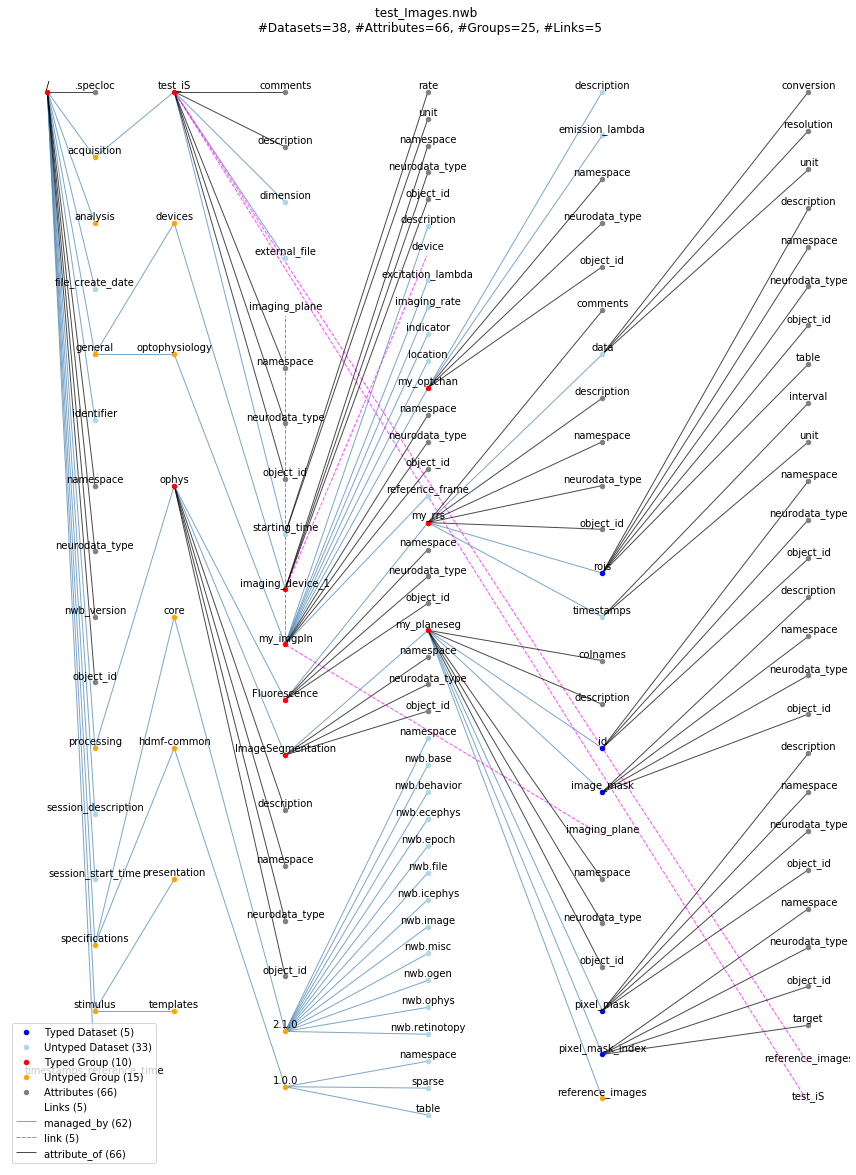

In [21]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files
output_filenames = filename
print("output_filenames = ", output_filenames)
    
filenames = output_filenames
print("filenames = ", filenames)

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
        
file_hierarchy = HierarchyDescription.from_hdf5(filenames)
file_graph = NXGraphHierarchyDescription(file_hierarchy)          
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
plot_title = filenames + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()
        
# Show a sorted bar plot with the sizes of all datasets in the file
if show_bar_plot:
    d = {i['name']: np.prod(i['size']) for i in file_hierarchy['datasets']}
    l = [w for w in sorted(d, key=d.get, reverse=True)]
    s = [d[w] for w in l]   
    p = np.arange(len(l))   
    fig,ax = plt.subplots(figsize=(16,7))
    ax.set_title(filename)
    ax.bar(p, s, width=1, color='r')
    ax.set_xticks(p+1)  
    ax.set_xticklabels(l)  
    ax.set_yscale("log", nonposy='clip')
    fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
    plt.show()

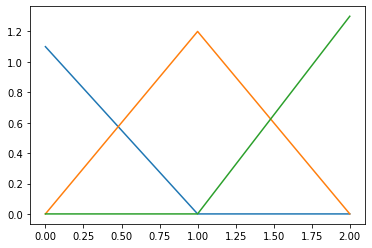

In [22]:
#mod
#ps
#img_mask1
#pix_mask1 
#rrs
#rrs_data
#rrs_timestamps
#rrs_rois

plt.plot(img_mask1)
plt.savefig('dir_tiff/img_mask1_nwb.tiff')
plt.show()

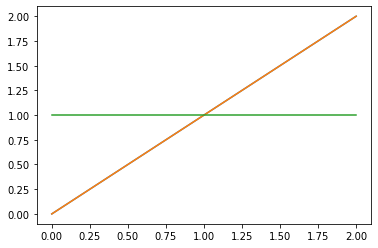

In [23]:
plt.plot(pix_mask1)
plt.show()

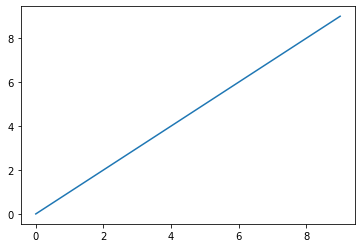

In [24]:
plt.plot(rrs_data)
plt.show()

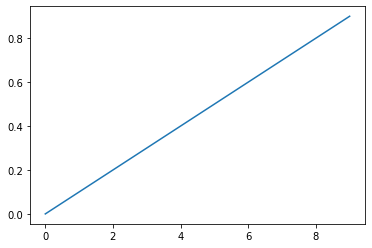

In [25]:
plt.plot(rrs_timestamps)
plt.show()

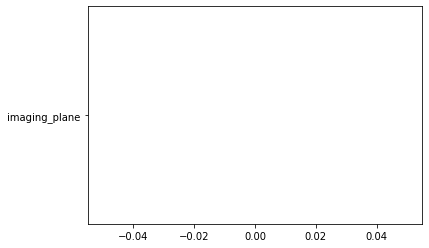

In [26]:
plt.plot(['imaging_plane'])
plt.show()

In [27]:
mod

ophys pynwb.base.ProcessingModule at 0x140001132577512
Fields:
  data_interfaces: {
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>
  }
  description: contains optical physiology processed data

In [28]:
ps

my_planeseg pynwb.ophys.PlaneSegmentation at 0x140001132529256
Fields:
  colnames: ['image_mask' 'pixel_mask']
  columns: (
    image_mask <class 'hdmf.common.table.VectorData'>,
    pixel_mask_index <class 'hdmf.common.table.VectorIndex'>,
    pixel_mask <class 'hdmf.common.table.VectorData'>
  )
  description: output from segmenting my favorite imaging plane
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [29]:
img_mask1

array([[1.1, 0. , 0. ],
       [0. , 1.2, 0. ],
       [0. , 0. , 1.3]])

In [30]:
pix_mask1 

array([[0, 0, 1],
       [1, 1, 1],
       [2, 2, 1]])

In [31]:
rrs

my_rrs pynwb.ophys.RoiResponseSeries at 0x140001132529368
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10,), type "<f8">
  description: no description
  interval: 1
  resolution: -1.0
  rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
  timestamps: <HDF5 dataset "timestamps": shape (10,), type "<f8">
  timestamps_unit: seconds
  unit: lumens

In [32]:
rrs_data

<HDF5 dataset "data": shape (10,), type "<f8">

In [33]:
rrs_timestamps

<HDF5 dataset "timestamps": shape (10,), type "<f8">

In [34]:
rrs_rois